# Artificial Neural Network for classification problem

The following example will define how to construct an ANN for a classification problem using
Keras and TensorFlow, using a reduced version of the https://www.kaggle.com/ntnutestimon/paysim1 dataset, but large enough to be able to properly train such an ANN.

---

The dataset contains information about ***bank transactions*** made in different time slots and with a
number of relevant entities associated with them.

The objective will be to ***detect whether or not
a transaction is fraudulent*** based on past knowledge of transactions that have already been
detected as such fraudulent, thus being a **supervised learning binary classification** problem.

---

The relevant entities that will be chosen for this issue are:
* type: Transaction type. Non-ordinal categorical variable that can take values 'CASHIN', 'CASH-OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'.
* amount: Total transaction always referring to the same currency.
* oldbalanceOrg: Initial balance of the source account before the transaction.
* oldbalanceDest: Initial balance of the target account before the transaction.
* isFraud: Categorical variable, is fraud (1) or is not (0).

----

All other variables are not considered to be linear combinations of those already mentioned or
for simplifying the model for this example.

----

This can define an ANN with **two intermediate layers** that have a ReLU as the activation
function and the output layer uses a sigmoid function so that the data is expressed as a binary
category. This ANN would look like this:
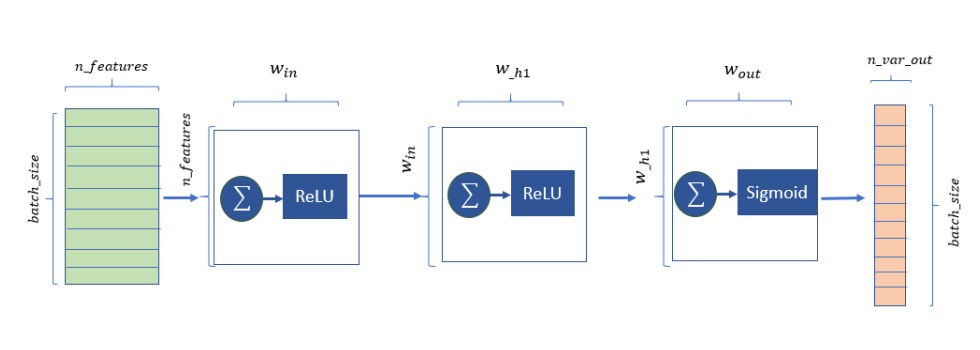

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

First, the data in question would be loaded and preprocessed so that the non-ordinal categorical
variable was expressed as different categories with binary values. NNSs need the data to have
similar magnitudes, so they are also standardized.

In [32]:
# =============================================================================
# Data Preparation
# =============================================================================

# Dataset -> https://www.kaggle.com/ntnu-testimon/paysim1
#dataset = pd.read_csv('paysim.csv')
#dataset = dataset.sort_values(by='isFraud', ascending=False)
#dataset.reset_index(drop=True, inplace=True)
#d = dataset[dataset['isFraud']==1]
#dataset = dataset.iloc[0:len(d)*2]
#dataset.to_csv('paysim_reduced.csv')

dataset = pd.read_csv('paysim_reduced.csv')

df_aux = pd.get_dummies(dataset['type']).astype('int')
dataset.drop(['type', 'Unnamed: 0', 'nameOrig',
              'nameDest', 'isFlaggedFraud', 'step',
              'newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)
dataset = dataset.join(df_aux)

X = dataset.loc[:, dataset.columns != 'isFraud'].values
y = dataset['isFraud'].values

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

All in all, the next step is to create an **ANN** using **keras' Dense and Sequential classes**.

----

Sequential is used to define a general frame of an NN to which layers will be added with its add
method.

---

We create an object that corresponds to the NN and add its structural components to it.

**Dense** allows us to create a **layer of hidden units interconnected with each other** and with the
input and linked to an activation function.

It is important to correctly define the dimensionality of
them, something that is done according to the scheme shown in the NN architecture image.


The cost function used will be cross-entropy for the binary case and an optimizer that can be
one of the previously seen, such as sgd or Adam, will be used.

----

This sgd it is actually a mini-batch as it receives a specific batch size. It would only be purely a sgd in
case the batch size was 1.

In [ ]:
# =============================================================================
# ANN Build
# =============================================================================
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


def create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay):
    """
    Function for creating a NN for binary classification using 2 HL

    """


    # Initialising the ANN
    model = Sequential()

    # First HL
    # [batch_size x n_features] x [n_features x w_in]
    model.add(Dense(units = w_in, input_dim = n_features,
                    kernel_initializer = 'normal',
                    activation = 'relu'))
    # Second HL
    # [batch_size x w_in] x [w_in x w_h1]
    model.add(Dense(units = w_h1, input_dim = w_in,
                    kernel_initializer = 'normal',
                    activation = 'relu'))

    # Output Layer
    # [batch_size x w_h1] x [w_h1 x w_out]
    model.add(Dense(units = n_var_out,
                    kernel_initializer = 'normal',
                    activation = 'sigmoid'))

    # Compile Model
    # Loss Function -> Cross Entropy (Binary)
    # Optimizer -> sgd, adam...
    if optimizer == 'sgd':
        keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

Once the NN structure is defined, the model is trained with adequate hyperparameters and with
a specific batch size and a number of epochs. These parameters may be searched many times
by trial and error and by checking for the validation data that combination gives the best results.

In [ ]:
## fix random seed for reproducibility
#from tensorflow import set_random_seed
#from numpy.random import seed
#value = 7
#seed(value)
#set_random_seed(value)

# Parameters
n_features = np.shape(X_train)[1]
w_in = 12
w_h1 = 8
n_var_out = 1
batch_size = 100
nb_epochs = 100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
model = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = batch_size)



# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Finally, the results are evaluated, and a confusion matrix is obtained to see the correctly
classified cases.

In [ ]:
# =============================================================================
# ANN Predictions
# =============================================================================
# Predict
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

Below are the results obtained for sgd and adam.


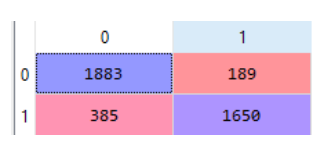

 Results obtained with SGD, batch size 100, 100 epochs, lr of 0.1 and momentum of 0.01, without
decay

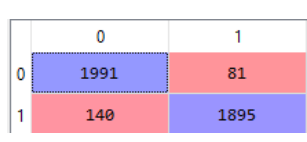


 Results obtained with a default Adam (lr-0.001, beta_1-0.9, beta_2-0.999, decay-0)

